In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [66]:
data = pd.read_csv("train.csv")

In [67]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

In [69]:
data_dev = data[0:1000].T # thousand examples of 28 by 28 image 

In [70]:
data_dev

array([[0, 4, 8, ..., 4, 2, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [72]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [73]:
Y_train

array([1, 3, 2, ..., 1, 7, 6], dtype=int64)

In [74]:
X_train[:,0].shape

(784,)

In [75]:
X_train[:,0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
np.random.rand(3, 2) - 0.5

array([[ 0.45631392, -0.30792469],
       [-0.32729495,  0.20259382],
       [ 0.4938694 , -0.24141145]])

In [77]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [78]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [79]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [80]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

2) Backward Propagation

In [81]:
def ReLU_deriv(Z):
    return Z > 0

In [82]:
def one_hot(Y):
    # print(Y.size, Y.max()) ---output----> 41000 9
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [83]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [84]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [85]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [86]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [87]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [88]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 6 4 ... 6 9 4] [1 3 2 ... 1 7 6]
0.07353658536585365
Iteration:  10
[5 6 3 ... 5 9 0] [1 3 2 ... 1 7 6]
0.19439024390243903
Iteration:  20
[9 6 3 ... 5 9 0] [1 3 2 ... 1 7 6]
0.28385365853658534
Iteration:  30
[9 6 3 ... 5 9 0] [1 3 2 ... 1 7 6]
0.3580731707317073
Iteration:  40
[9 3 3 ... 5 9 0] [1 3 2 ... 1 7 6]
0.43541463414634146
Iteration:  50
[9 3 3 ... 1 9 0] [1 3 2 ... 1 7 6]
0.5069756097560976
Iteration:  60
[1 3 0 ... 1 9 6] [1 3 2 ... 1 7 6]
0.5668048780487804
Iteration:  70
[1 3 0 ... 1 9 6] [1 3 2 ... 1 7 6]
0.6158292682926829
Iteration:  80
[1 3 0 ... 1 7 6] [1 3 2 ... 1 7 6]
0.6525365853658537
Iteration:  90
[1 3 0 ... 1 7 6] [1 3 2 ... 1 7 6]
0.6802439024390244
Iteration:  100
[1 3 0 ... 1 7 6] [1 3 2 ... 1 7 6]
0.7021463414634146
Iteration:  110
[1 3 0 ... 1 7 6] [1 3 2 ... 1 7 6]
0.7201951219512195
Iteration:  120
[1 3 0 ... 1 7 6] [1 3 2 ... 1 7 6]
0.7343170731707317
Iteration:  130
[1 3 0 ... 1 7 6] [1 3 2 ... 1 7 6]
0.746390243902439
Iteration:  14

In [89]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


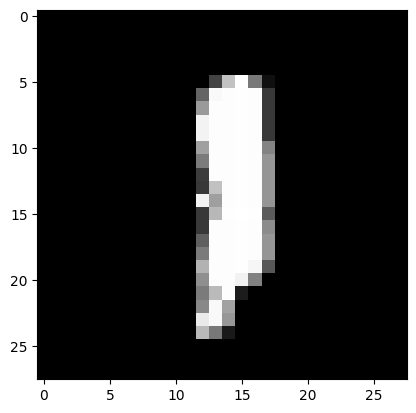

Prediction:  [3]
Label:  3


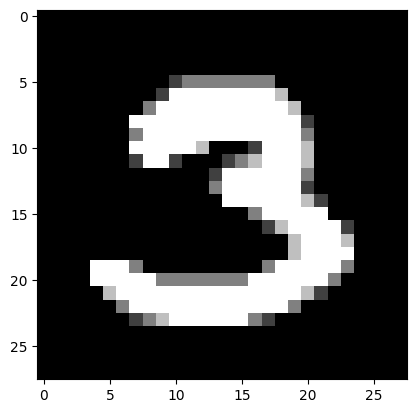

Prediction:  [2]
Label:  2


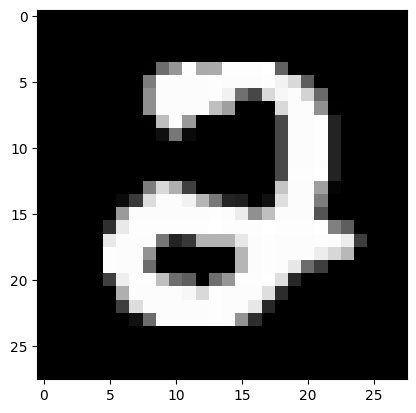

Prediction:  [9]
Label:  4


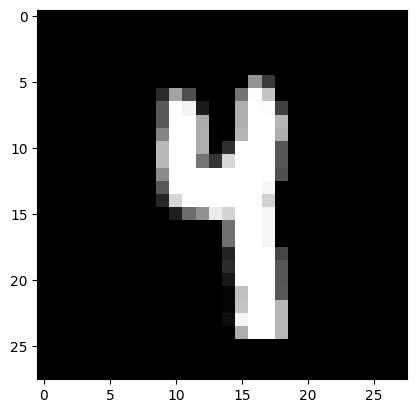

In [90]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [91]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 4 8 8 8 4 2 4 4 8 5 0 6 0 9 1 3 5 0 9 3 9 8 5 7 5 0 0 5 0 7 2 7 0 2 2 4
 1 6 1 3 6 1 9 2 1 3 7 7 8 3 9 4 8 6 6 2 6 7 0 6 5 9 4 5 7 4 8 2 7 5 3 8 3
 0 4 7 7 6 7 8 6 6 3 3 7 6 5 1 7 2 0 1 4 2 8 6 0 9 0 1 7 4 7 8 4 9 5 8 6 9
 1 5 0 2 2 0 1 1 6 6 0 8 1 2 2 0 6 9 9 9 7 9 2 0 3 4 0 9 8 9 0 8 6 6 6 4 3
 7 3 8 5 3 2 2 8 4 1 6 0 7 1 3 7 0 0 0 7 1 5 4 3 3 7 0 4 7 9 1 7 2 8 1 1 8
 8 9 4 6 1 3 2 6 5 0 0 5 9 6 9 9 2 7 9 6 7 4 5 9 7 2 2 1 4 9 4 1 9 6 4 7 5
 0 3 6 5 4 7 9 3 9 8 8 9 1 9 0 7 7 9 8 8 3 4 2 3 0 9 7 9 0 4 6 6 0 3 0 2 1
 7 5 0 1 1 8 7 0 5 3 7 7 4 9 7 8 3 1 4 0 7 6 7 4 4 7 0 8 1 8 9 6 3 3 6 7 9
 5 7 1 9 6 2 0 9 6 9 5 0 1 7 8 3 5 5 0 9 6 6 4 9 3 4 7 9 1 9 7 0 4 1 6 9 2
 4 8 0 5 4 4 1 2 7 2 9 2 4 2 7 5 0 7 3 6 3 0 7 8 6 3 5 2 0 0 6 4 9 0 1 6 5
 7 9 0 7 8 3 9 1 5 8 0 2 4 4 8 0 3 2 1 2 5 4 5 1 8 6 5 2 6 7 0 1 9 2 0 7 2
 0 6 3 8 3 6 4 0 1 5 5 5 4 7 8 2 1 7 7 4 2 6 7 6 8 1 0 0 6 3 0 2 8 2 3 0 1
 0 7 2 4 5 9 2 0 9 4 1 2 6 1 3 0 9 2 7 7 5 8 9 6 6 5 9 0 7 9 5 4 0 6 1 7 6
 7 2 3 5 6 7 8 5 3 2 5 7 

0.876